In [15]:
import pandas as pd

In [16]:
df=pd.read_csv('/Users/marurun66/Documents/GitHub/customer_mini/클러스터링고객데이터_2.csv')

In [4]:
#클러스터별 특징 파악하기
cluster_analysis = df.groupby('Cluster').agg({
    '연령대': ['mean', 'median', 'std'],
    '거래 금액 (Transaction Amount)': ['mean', 'median', 'std'],
    '제품 구매 빈도 (Purchase Frequency)': ['mean', 'median', 'std'],
    '성별 (Gender)': lambda x: x.mode()[0],  # 가장 많이 선택된 성별
    '차량구분(vehicle types)': lambda x: x.mode()[0],  # 가장 많이 선택된 차량
    '거래 방식 (Transaction Method)': lambda x: x.mode()[0],  # 가장 많이 선택된 거래 방식
    '제품 출시년월 (Launch Date)': lambda x: x.mode()[0],  # 가장 많이 선택된 출시 년월
    '고객 세그먼트 (Customer Segment)': lambda x: x.mode()[0],  # 가장 많이 선택된 고객 세그먼트
}).reset_index()


In [5]:
pd.options.display.float_format = '{:,.0f}'.format
cluster_analysis

Cluster  연령대            거래 금액 (Transaction Amount)                        \
          mean median std                       mean     median        std   
0       0   55     56  12                 77,560,732 76,580,000 13,791,695   
1       1   54     52   9                 42,484,510 40,970,000  7,761,555   
2       2   37     38   9                 43,272,982 41,850,000 10,312,694   
3       3   27     26   4                 61,455,581 62,270,000 15,256,519   
4       4   60     62   7                 49,689,744 48,350,000 12,701,798   
5       5   48     48  11                 76,400,164 78,930,000  9,640,111   

  제품 구매 빈도 (Purchase Frequency)            성별 (Gender) 차량구분(vehicle types)  \
                           mean median std    <lambda>            <lambda>   
0                             5      5   1           남                픽업트럭   
1                             4      4   1           여              대형 suv   
2                             2      1   1           남              준대형 세단   
3                             3      4   1           여              대형 suv   
4                             2      2   1           여              준중형 세단   
5                             2      2   1           남              준대형 세단   

  거래 방식 (Transaction Method) 제품 출시년월 (Launch Date) 고객 세그먼트 (Customer Segment)  
                    <lambda>              <lambda>                   <lambda>  
0                         현금               2018-01                        vip  
1                         현금               2018-01                        vip  
2                         카드               2018-01                         일반  
3                         현금               2018-01                         신규  
4                         카드               2020-03                         일반  
5                         현금               2018-01                         일반

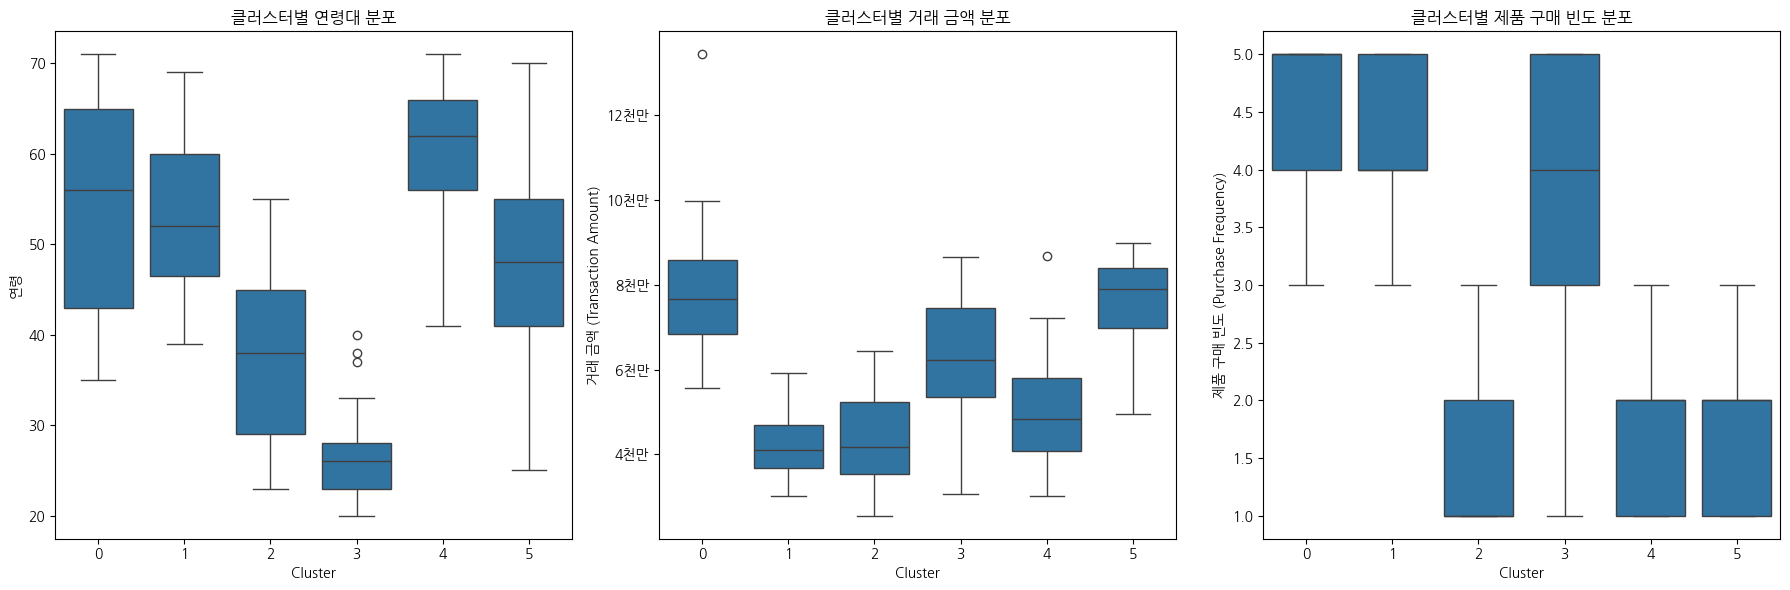

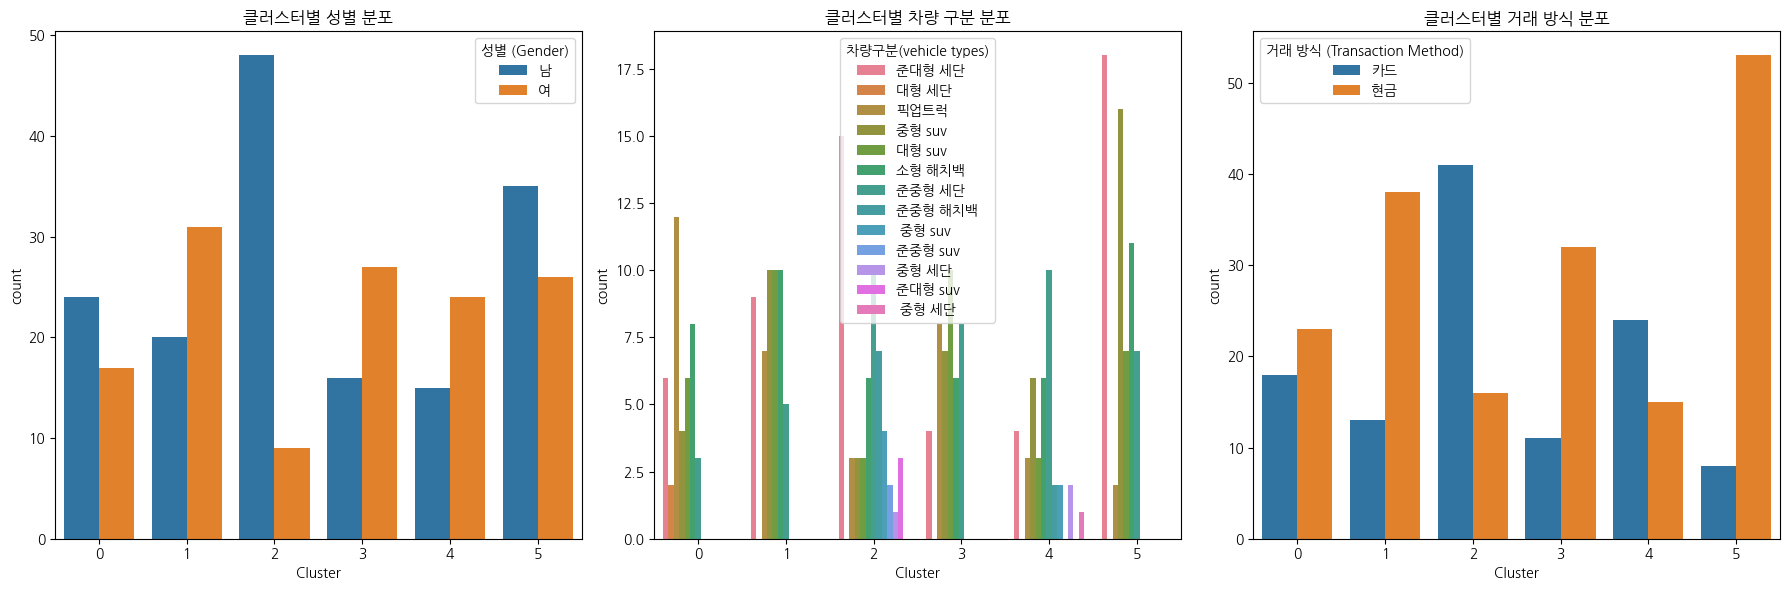

/var/folders/wz/cf10k4857715p70flsxw2g9m0000gn/T/ipykernel_82557/3446315809.py:72: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sns.heatmap(cluster_means_scaled_df, annot=cluster_means[['연령대', '거래 금액 (Transaction Amount)', '제품 구매 빈도 (Purchase Frequency)']].applymap(lambda x: f'{x:,.0f}'),


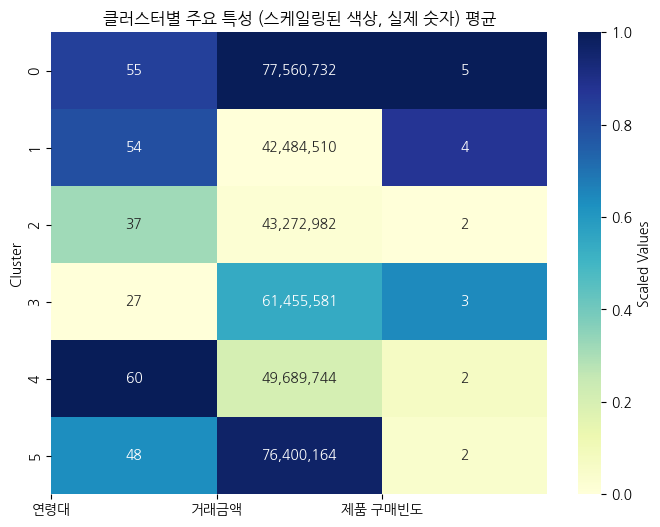

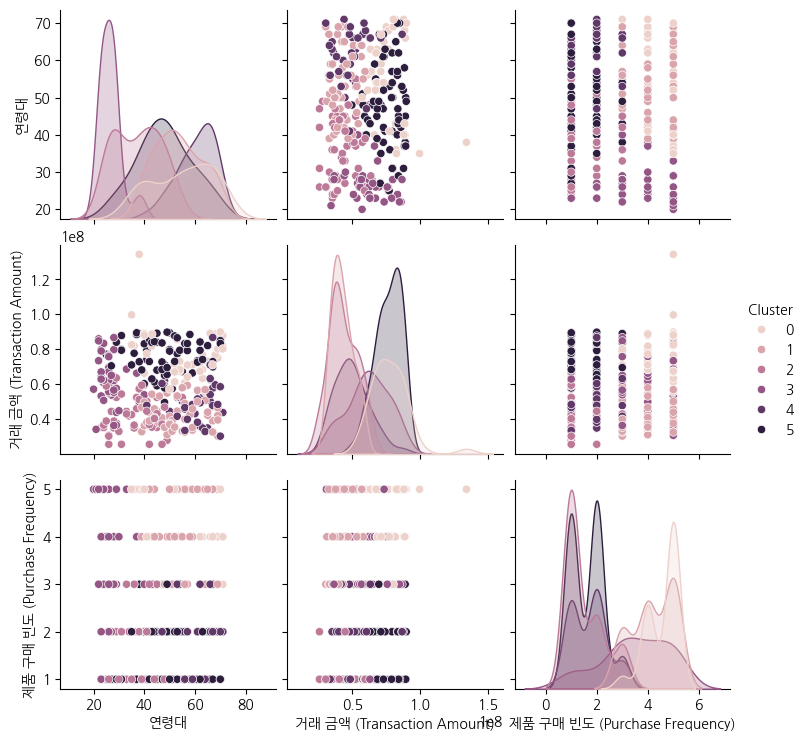

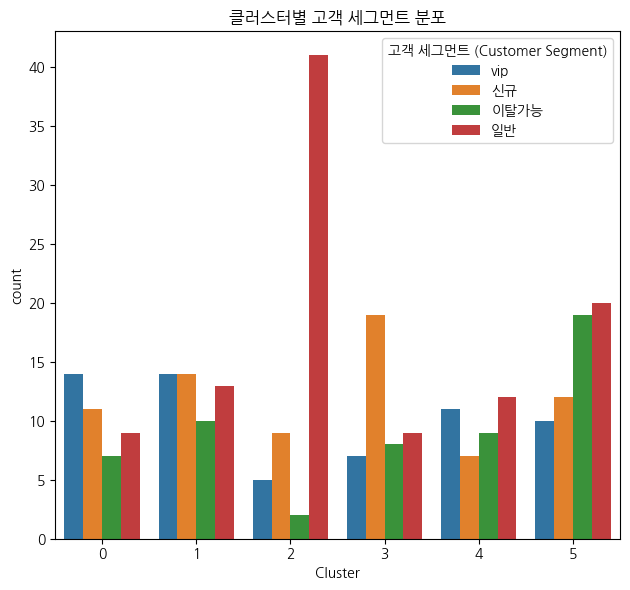

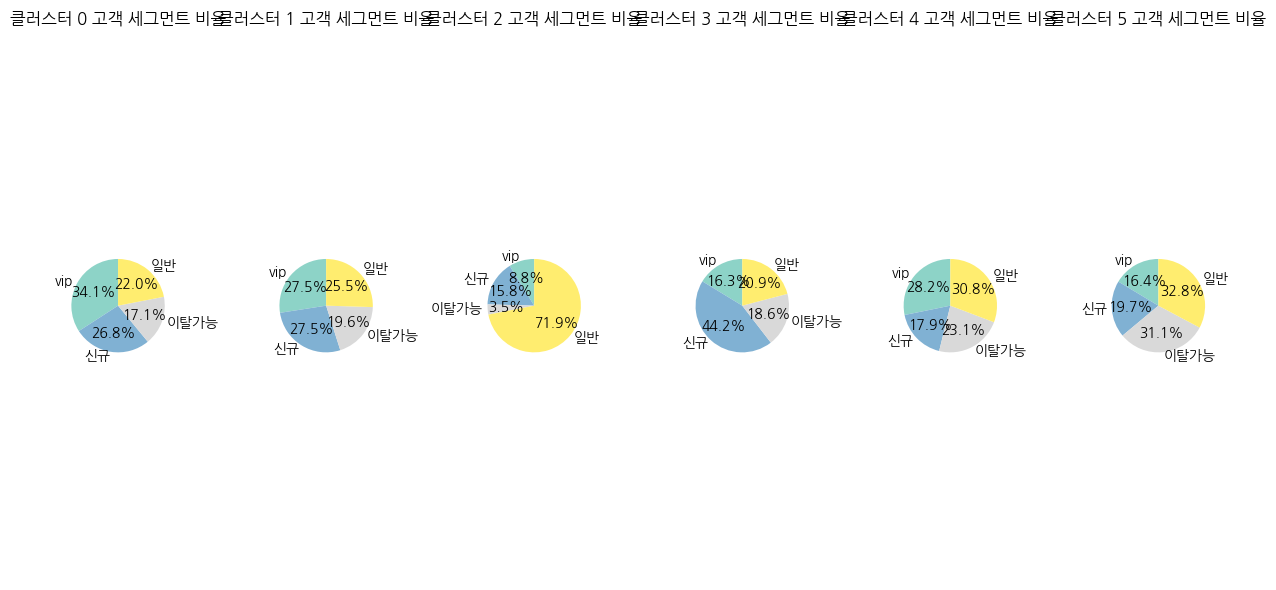

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# 한글 폰트 설정
plt.rc('font', family='NanumGothic')

# 숫자 포매팅 함수 정의 (천만 단위로 표기)
def format_ticks(x, pos):
    return '{:,.0f}'.format(x / 1e7) + '천만'  # 10,000,000 단위로 '천만' 추가

# 1. 클러스터별 연령대, 거래 금액, 제품 구매 빈도 박스플롯
plt.figure(figsize=(18, 6))

# 연령대 박스플롯
plt.subplot(1, 3, 1)
sns.boxplot(x='Cluster', y='연령', data=df)
plt.title('클러스터별 연령대 분포')

# 거래 금액 박스플롯
plt.subplot(1, 3, 2)
sns.boxplot(x='Cluster', y='거래 금액 (Transaction Amount)', data=df)
plt.title('클러스터별 거래 금액 분포')

# 천만 단위로 포맷팅
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_ticks))

# 제품 구매 빈도 박스플롯
plt.subplot(1, 3, 3)
sns.boxplot(x='Cluster', y='제품 구매 빈도 (Purchase Frequency)', data=df)
plt.title('클러스터별 제품 구매 빈도 분포')

plt.tight_layout()
plt.savefig('클러스터별 연령대, 거래금액, 제품구매빈도 분포.png')
plt.show()

# 2. 클러스터별 성별, 차량 구분, 거래 방식 바 차트
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.countplot(x='Cluster', hue='성별 (Gender)', data=df)
plt.title('클러스터별 성별 분포')

plt.subplot(1, 3, 2)
sns.countplot(x='Cluster', hue='차량구분(vehicle types)', data=df)
plt.title('클러스터별 차량 구분 분포')

plt.subplot(1, 3, 3)
sns.countplot(x='Cluster', hue='거래 방식 (Transaction Method)', data=df)
plt.title('클러스터별 거래 방식 분포')

plt.tight_layout()
plt.savefig('클러스터별 성별, 차량구분, 거래방식 분포.png')
plt.show()

# 1. 클러스터별 주요 특성 (연령대, 거래 금액, 제품 구매 빈도) 선택
cluster_features = df[['Cluster', '연령대', '거래 금액 (Transaction Amount)', '제품 구매 빈도 (Purchase Frequency)']]
cluster_means = cluster_features.groupby('Cluster').mean()

# 2. 스케일링 (Min-Max Scaling 사용) - 색상만 스케일링
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cluster_means_scaled = scaler.fit_transform(cluster_means[['연령대', '거래 금액 (Transaction Amount)', '제품 구매 빈도 (Purchase Frequency)']])

# 스케일링된 데이터로 DataFrame 생성
cluster_means_scaled_df = pd.DataFrame(cluster_means_scaled, columns=['연령대', '거래 금액 (Transaction Amount)', '제품 구매 빈도 (Purchase Frequency)'], index=cluster_means.index)

# 3. 히트맵 그리기
plt.figure(figsize=(8, 6))

# 색상은 스케일링된 값을 사용하고, 값은 천 단위로 구분하여 포맷팅 (annot는 실제 값으로 표시)
sns.heatmap(cluster_means_scaled_df, annot=cluster_means[['연령대', '거래 금액 (Transaction Amount)', '제품 구매 빈도 (Purchase Frequency)']].applymap(lambda x: f'{x:,.0f}'),
            cmap="YlGnBu", cbar_kws={'label': 'Scaled Values'}, fmt='')
plt.xticks(ticks=[0, 1, 2], labels=['연령대', '거래금액', '제품 구매빈도'], rotation=0)

plt.title('클러스터별 주요 특성 (스케일링된 색상, 실제 숫자) 평균')
plt.show()

# 4. 산점도 행렬 (Pairplot)
sns.pairplot(df, hue="Cluster", vars=["연령대", "거래 금액 (Transaction Amount)", "제품 구매 빈도 (Purchase Frequency)"])
plt.savefig('산점도행렬.png')
plt.show()

# 5. 고객 세그먼트 비율

# 1. 클러스터별 고객 세그먼트 분포 바 차트
plt.figure(figsize=(18, 6))

# 고객 세그먼트 분포
plt.subplot(1, 3, 1)
sns.countplot(x='Cluster', hue='고객 세그먼트 (Customer Segment)', data=df)
plt.title('클러스터별 고객 세그먼트 분포')

plt.tight_layout()
plt.savefig('클러스터별 고객 세그먼트 분포.png')
plt.show()

# 2. 클러스터별 고객 세그먼트의 비율을 파이 차트로 시각화
plt.figure(figsize=(12, 6))

# 고객 세그먼트 비율
cluster_segment_counts = df.groupby('Cluster')['고객 세그먼트 (Customer Segment)'].value_counts().unstack()
cluster_segment_percentages = cluster_segment_counts.div(cluster_segment_counts.sum(axis=1), axis=0) * 100

# 각 클러스터에 대한 파이 차트
for i, cluster in enumerate(cluster_segment_percentages.index):
    plt.subplot(1, len(cluster_segment_percentages), i + 1)
    cluster_segment_percentages.loc[cluster].plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap="Set3", 
                                                  title=f'클러스터 {cluster} 고객 세그먼트 비율', ylabel='')
    plt.axis('equal')  # 원이 잘 보이도록 비율 맞추기

plt.tight_layout()
plt.savefig('클러스터별 고객 세그먼트 비율 파이차트.png')
plt.show()


In [8]:
print(df['Cluster'].value_counts())

Cluster
8    46
6    36
7    35
5    33
4    32
2    30
0    30
3    27
1    27
Name: count, dtype: int64
